In [13]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load data
df = pd.read_csv(r'C:/Users/Heikki/Documents/Portfolio/Data/netflix_titles.csv')

# View dataset
df.head()
print(df.info())







<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [ ]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load data
df = pd.read_csv(r'C:/Users/Heikki/Documents/Portfolio/Data/netflix_titles.csv')

# Combining relevant metadata into a single string
df['combined_features'] = df['listed_in'] + ' ' + df['director'].fillna('') + ' ' + df['cast'].fillna('')

# Vectorizing the combined features
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

# Compute similarity between all titles
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get recommendations based on title
def get_recommendations(title, cosine_sim=cosine_sim):
    indices = pd.Series(df.index, index=df['title']).drop_duplicates()
    idx = indices[title]
    
    # Get similarity scores for the selected movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Top 10 most similar movies
    
    # Return movie titles
    movie_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[movie_indices]

# Example usage
print(get_recommendations('Breaking Bad'))

2931                         Better Call Saul
6166                      Anjaan: Rural Myths
6744            Fear Files... Har Mod Pe Darr
3053    Border Security: America's Front Line
69             Stories by Rabindranath Tagore
1056                           Ajaibnya Cinta
1282                         Zindagi in Short
2322                                 Homemade
6788                            Forget Me Not
1535                    How To Ruin Christmas
Name: title, dtype: object


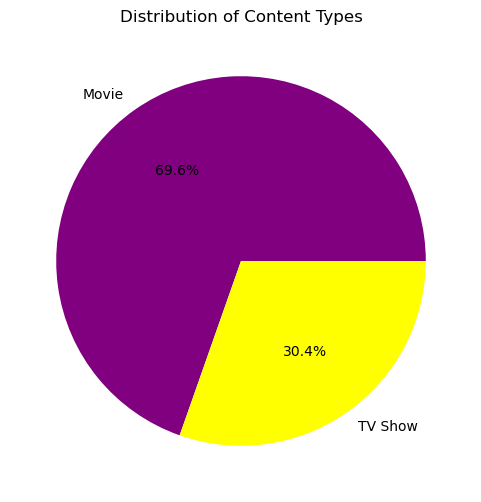

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv(r'C:/Users/Heikki/Documents/Portfolio/Data/netflix_titles.csv')

# Count content types
content_type_counts = df['type'].value_counts()

# Plotting
plt.figure(figsize=(6, 6))
content_type_counts.plot(kind='pie', autopct='%1.1f%%', colors=['purple', 'yellow'], labels=content_type_counts.index)
plt.title('Distribution of Content Types')
plt.ylabel('')
plt.show()

C:\Users\Heikki\AppData\Local\Temp\ipykernel_15452\2507435834.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='magma')


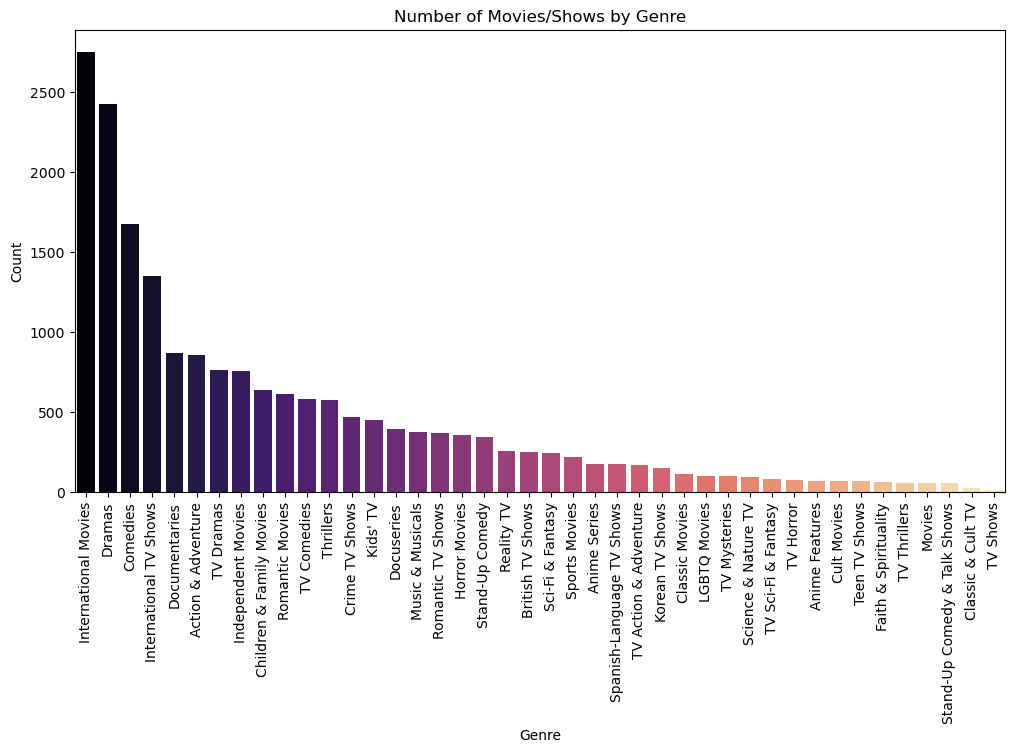

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(r'C:/Users/Heikki/Documents/Portfolio/Data/netflix_titles.csv')

# Count the number of shows in each genre
genre_counts = df['listed_in'].str.split(', ', expand=True).stack().value_counts()

# Plot the genre counts
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='magma')
plt.xticks(rotation=90)
plt.title('Number of Movies/Shows by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

C:\Users\Heikki\AppData\Local\Temp\ipykernel_15452\920857257.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_df.head(10), x='Count', y='Genre', palette='viridis')


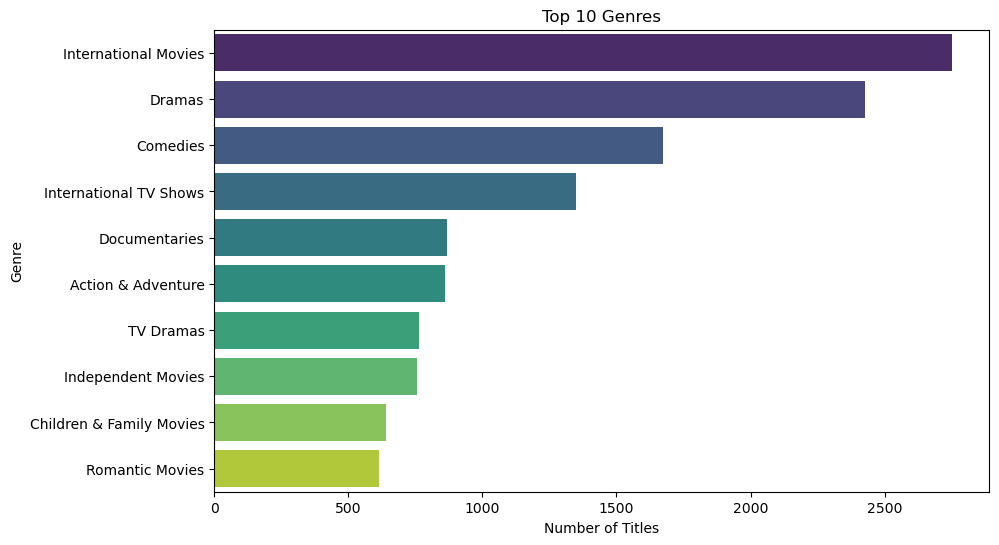

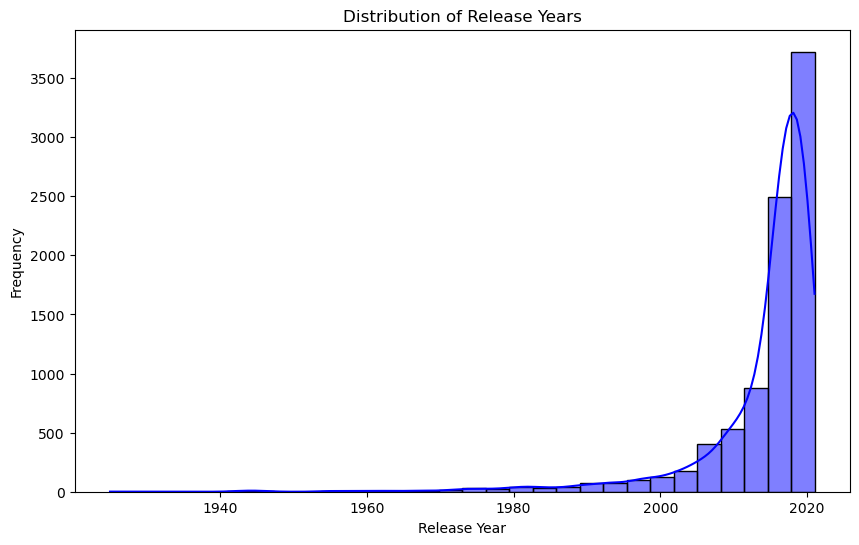

In [27]:
# Split genres and count occurrences
from collections import Counter

# Load data
df = pd.read_csv(r'C:/Users/Heikki/Documents/Portfolio/Data/netflix_titles.csv')

genre_counts = Counter([genre for sublist in df['listed_in'].str.split(', ') for genre in sublist])
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=genre_df.head(10), x='Count', y='Genre', palette='viridis')
plt.title('Top 10 Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['release_year'], bins=30, kde=True, color='blue')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()


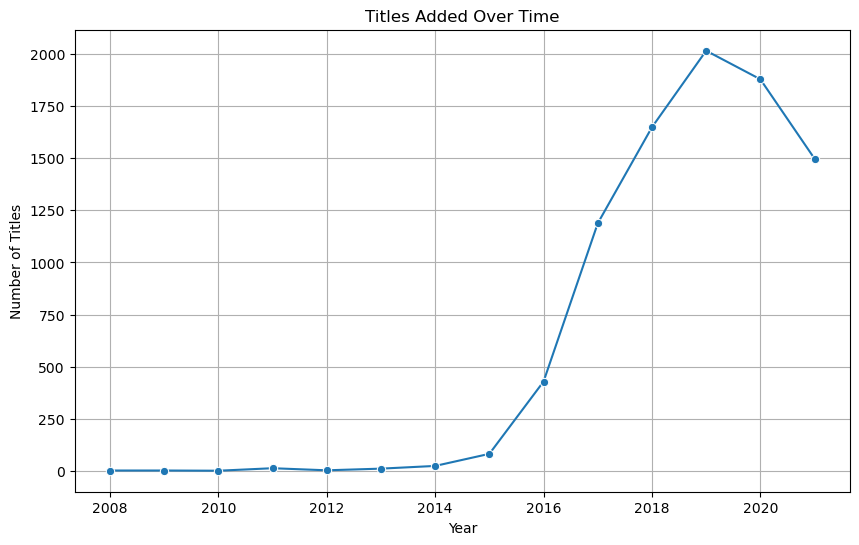

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv(r'C:/Users/Heikki/Documents/Portfolio/Data/netflix_titles.csv')

# Clean and convert 'date_added' column
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract the year from 'date_added'
df['year_added'] = df['date_added'].dt.year

# Count titles by year
titles_by_year = df['year_added'].value_counts().sort_index()

# Plot titles added over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x=titles_by_year.index, y=titles_by_year.values, marker='o')
plt.title('Titles Added Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid()
plt.show()


C:\Users\Heikki\AppData\Local\Temp\ipykernel_15452\1357471713.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='plasma')


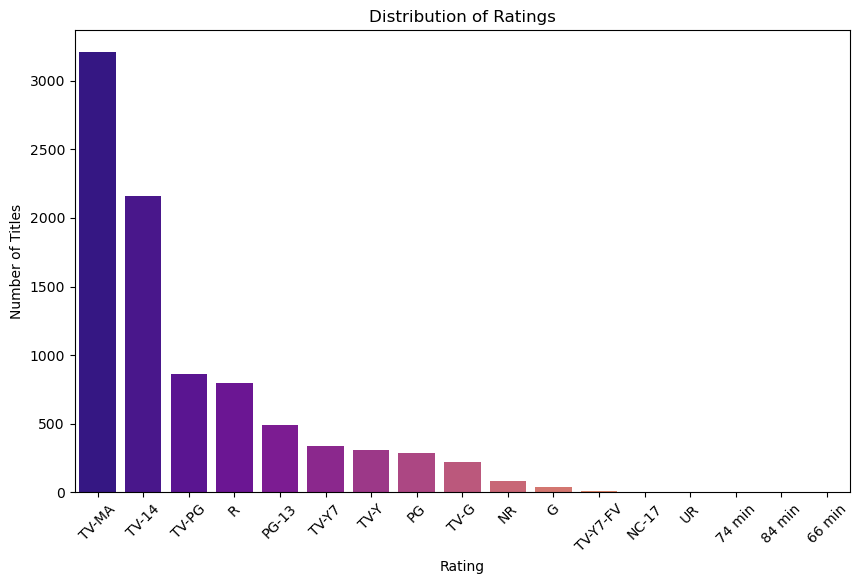

In [33]:
# Load data
df = pd.read_csv(r'C:/Users/Heikki/Documents/Portfolio/Data/netflix_titles.csv')

# Count ratings
rating_counts = df['rating'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='plasma')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

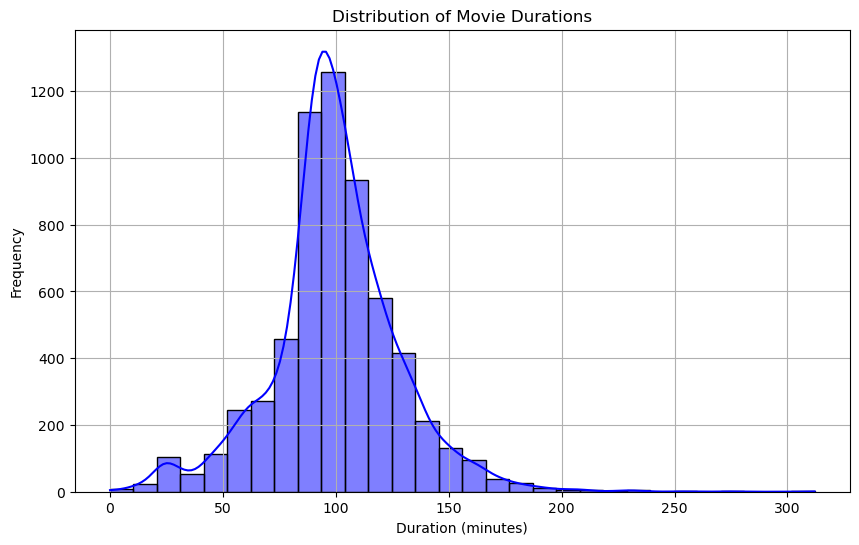

In [37]:
# Load data
df = pd.read_csv(r'C:/Users/Heikki/Documents/Portfolio/Data/netflix_titles.csv')

# Filter movies and create a new DataFrame to avoid SettingWithCopyWarning
movies = df[df['type'] == 'Movie'].copy()

# Handle missing values in 'duration'
movies['duration'] = movies['duration'].fillna('0 min')  # Replace NaN with '0 min'

# Clean and convert 'duration' column
movies['duration'] = movies['duration'].str.replace(' min', '').astype(int)

# Plot movie durations
plt.figure(figsize=(10, 6))
sns.histplot(movies['duration'], bins=30, kde=True, color='blue')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

















In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
df = pd.read_csv(r'C:/Users/Heikki/Documents/Portfolio/Data/netflix_titles.csv')

# Handle missing values in 'description' and 'listed_in' columns (if necessary)
df['description'] = df['description'].fillna('')
df['listed_in'] = df['listed_in'].fillna('')

# Combine relevant text fields for content-based filtering
df['content'] = df['description'] + ' ' + df['listed_in']

# Vectorization using TF-IDF (for content-based recommendation)
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['content'])

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Create a Series to map movie titles to indices
indices = pd.Series(df.index, index=df['title']).to_dict()

# Function for generating recommendations
def recommend_titles(title, num_recommendations=5, genre_filter='', type_filter=''):
    if title not in indices:
        print("Title not found.")
        return []

    idx = indices[title]  # Get index of the input title
    sim_scores = sorted(list(enumerate(cosine_sim[idx])), key=lambda x: x[1], reverse=True)[1:num_recommendations + 1]
    
    # Filter recommendations based on genre and type
    recommendations = [
        df.iloc[i[0]]['title']
        for i in sim_scores
        if (genre_filter.lower() in df.iloc[i[0]]['listed_in'].lower() or not genre_filter) and 
           (type_filter.lower() in df.iloc[i[0]]['type'].lower() or not type_filter)
    ]

    return recommendations

# Function to handle user input and display recommendations
def get_user_input_and_recommend():
    # Get user input first
    title = input("Enter a movie or TV show title: ")
    genre_filter = input("Enter genre filter (leave empty for no filter): ").lower()
    type_filter = input("Enter type filter (Movie/TV Show, leave empty for no filter): ").lower()

    # Run recommendations with filters based on input
    recommendations = recommend_titles(title, genre_filter=genre_filter, type_filter=type_filter)

    if recommendations:
        print(f"\nTop {len(recommendations)} recommendations for '{title}':")
        for i, rec in enumerate(recommendations, 1):
            print(f"{i}. {rec}")
    else:
        print("No recommendations found.")

# Run the program to get input and display recommendations
get_user_input_and_recommend()


In [ ]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

# Load data
df = pd.read_csv(r'C:/Users/Heikki/Documents/Portfolio/Data/netflix_titles.csv')

# Check duplicates drop Nulls and check data length
df.duplicated().sum()
df.dropna()
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   12
Count of rows in the data is:   8807
